In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr


In [7]:
# Load the new data
df = pd.read_csv('celltypist_results.csv')
df

,Cell Type,Relative Frequency (%),Accuracy Base,Accuracy Aug
0,"naive thymus-derived CD4-positive, alpha-beta ...",25.180538,0.964649,0.962443
1,classical monocyte,16.608181,0.973813,0.961984
2,natural killer cell,10.217188,0.925474,0.864342
3,CD4-positive helper T cell,9.631878,0.839218,0.808975
4,"naive thymus-derived CD8-positive, alpha-beta ...",8.703781,0.926370,0.926370
5,naive B cell,5.918138,0.959249,0.936584
6,"CD8-positive, alpha-beta cytotoxic T cell",4.984622,0.842077,0.756999
7,non-classical monocyte,3.731353,0.968410,0.974582
8,"central memory CD8-positive, alpha-beta T cell",2.720609,0.512948,0.490040
9,regulatory T cell,2.265368,0.785885,0.831340


/var/folders/gv/b56jzzws1_923v86q0020jknzdcmt7/T/ipykernel_23790/3939743031.py:64: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


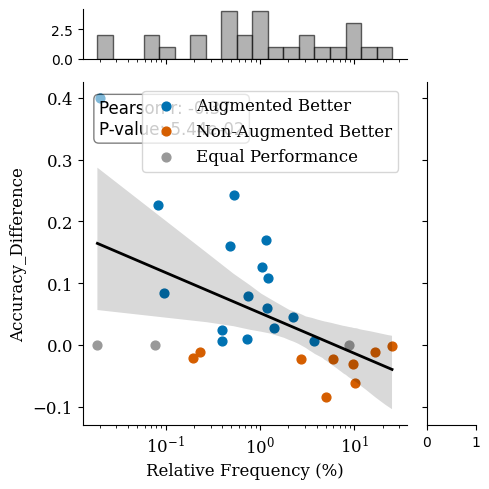

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Load the new data
df = pd.read_csv('celltypist_results.csv')

# Calculate the difference between Accuracy Augmented and Base
df['Accuracy_Difference'] = df['Accuracy Aug'] - df['Accuracy Base']
df = df[df['Relative Frequency (%)'] != df['Relative Frequency (%)'].min()]

# Filter the data for positive, negative, and equal non-zero differences
positive_diff = df[df['Accuracy_Difference'] > 0]
negative_diff = df[df['Accuracy_Difference'] < 0]
equal_non_zero_diff = df[(df['Accuracy_Difference'] == 0)]

# Use a colorblind-friendly palette
color_augmented = '#0072B2'  # Blue
color_non_augmented = '#D55E00'  # Vermilion
color_equal = '#999999'  # Grey

# Create a JointGrid without the right histogram (deactivate marginal plots)
g = sns.JointGrid(x='Relative Frequency (%)', y='Accuracy_Difference', data=df, height=5, marginal_ticks=True, space=0.2)

# Plot the scatter points with color depending on the sign of the Accuracy_Difference
g.ax_joint.scatter(positive_diff['Relative Frequency (%)'], positive_diff['Accuracy_Difference'], 
                   s=40, color=color_augmented, label="Augmented Better")

g.ax_joint.scatter(negative_diff['Relative Frequency (%)'], negative_diff['Accuracy_Difference'], 
                   s=40, color=color_non_augmented, label="Non-Augmented Better")

g.ax_joint.scatter(equal_non_zero_diff['Relative Frequency (%)'], equal_non_zero_diff['Accuracy_Difference'], 
                   s=40, color=color_equal, label="Equal Performance")

# Histogram on the top
g.ax_marg_x.hist(df['Relative Frequency (%)'], bins=np.geomspace(df['Relative Frequency (%)'].min(), df['Relative Frequency (%)'].max(), 20), 
                 alpha=.6, edgecolor='black', color='grey')

# Labels & Title
font = {'size': 12, 'family': 'serif'}
g.set_axis_labels('Relative Frequency (%)', 'Performance Difference (Δ Accuracy)', **font)
g.ax_joint.set_xscale('log')

# Calculate Pearson correlation
pearson_corr, p_value = pearsonr(df['Relative Frequency (%)'], df['Accuracy_Difference'])

# Add the trend line
sns.regplot(x='Relative Frequency (%)', y='Accuracy_Difference', data=df, ax=g.ax_joint, scatter=False, color='black', line_kws={"linewidth":2}, logx=True)

# Add the Pearson correlation coefficient to the plot
g.ax_joint.text(0.05, 0.95, f'Pearson r: {pearson_corr:.2f}\nP-value: {p_value:.2e}',
                transform=g.ax_joint.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Adjust legend with font properties
g.ax_joint.legend(prop=font)

# Apply font properties to all tick labels
for label in g.ax_joint.get_xticklabels() + g.ax_joint.get_yticklabels():
    label.set_fontsize(font['size'])
    label.set_family(font['family'])

plt.tight_layout()
plt.savefig('celltypist_pbmc.svg', bbox_inches='tight')  # Save as SVG
plt.show()


In [34]:
df = pd.read_csv('scGPT_results.csv')
df

,Cell Type,Relative Frequency (%),Accuracy Base,Accuracy Aug
0,"naive thymus-derived CD4-positive, alpha-beta ...",25.180538,0.873984,0.899704
1,classical monocyte,16.608181,0.980339,0.961821
2,natural killer cell,10.217188,0.913009,0.850550
3,CD4-positive helper T cell,9.631878,0.804895,0.753974
4,"naive thymus-derived CD8-positive, alpha-beta ...",8.703781,0.825031,0.786115
5,naive B cell,5.918138,0.957875,0.975733
6,"CD8-positive, alpha-beta cytotoxic T cell",4.984622,0.776026,0.669204
7,non-classical monocyte,3.731353,0.948802,0.963326
8,"central memory CD8-positive, alpha-beta T cell",2.720609,0.451693,0.331673
9,regulatory T cell,2.265368,0.276316,0.319976


/var/folders/gv/b56jzzws1_923v86q0020jknzdcmt7/T/ipykernel_23790/3364767588.py:64: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


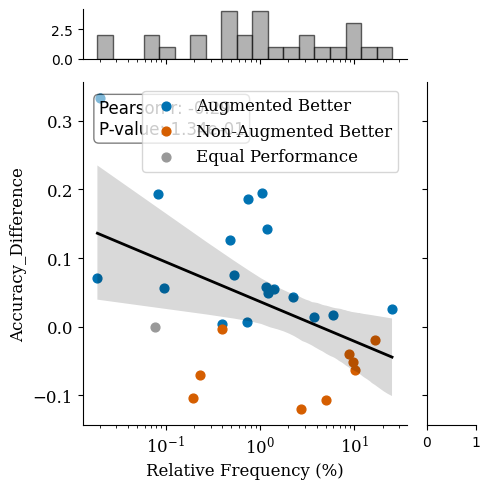

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Load the new data
df = pd.read_csv('scGPT_results.csv')

# Calculate the difference between Accuracy Augmented and Base
df['Accuracy_Difference'] = df['Accuracy Aug'] - df['Accuracy Base']
df = df[df['Relative Frequency (%)'] != df['Relative Frequency (%)'].min()]

# Filter the data for positive, negative, and equal non-zero differences
positive_diff = df[df['Accuracy_Difference'] > 0]
negative_diff = df[df['Accuracy_Difference'] < 0]
equal_non_zero_diff = df[(df['Accuracy_Difference'] == 0)]

# Use a colorblind-friendly palette
color_augmented = '#0072B2'  # Blue
color_non_augmented = '#D55E00'  # Vermilion
color_equal = '#999999'  # Grey

# Create a JointGrid without the right histogram (deactivate marginal plots)
g = sns.JointGrid(x='Relative Frequency (%)', y='Accuracy_Difference', data=df, height=5, marginal_ticks=True, space=0.2)

# Plot the scatter points with color depending on the sign of the Accuracy_Difference
g.ax_joint.scatter(positive_diff['Relative Frequency (%)'], positive_diff['Accuracy_Difference'], 
                   s=40, color=color_augmented, label="Augmented Better")

g.ax_joint.scatter(negative_diff['Relative Frequency (%)'], negative_diff['Accuracy_Difference'], 
                   s=40, color=color_non_augmented, label="Non-Augmented Better")

g.ax_joint.scatter(equal_non_zero_diff['Relative Frequency (%)'], equal_non_zero_diff['Accuracy_Difference'], 
                   s=40, color=color_equal, label="Equal Performance")

# Histogram on the top
g.ax_marg_x.hist(df['Relative Frequency (%)'], bins=np.geomspace(df['Relative Frequency (%)'].min(), df['Relative Frequency (%)'].max(), 20), 
                 alpha=.6, edgecolor='black', color='grey')

# Labels & Title
font = {'size': 12, 'family': 'serif'}
g.set_axis_labels('Relative Frequency (%)', 'Performance Difference (Δ Accuracy)', **font)
g.ax_joint.set_xscale('log')

# Calculate Pearson correlation
pearson_corr, p_value = pearsonr(df['Relative Frequency (%)'], df['Accuracy_Difference'])

# Add the trend line
sns.regplot(x='Relative Frequency (%)', y='Accuracy_Difference', data=df, ax=g.ax_joint, scatter=False, color='black', line_kws={"linewidth":2}, logx=True)

# Add the Pearson correlation coefficient to the plot
g.ax_joint.text(0.05, 0.95, f'Pearson r: {pearson_corr:.2f}\nP-value: {p_value:.2e}',
                transform=g.ax_joint.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Adjust legend with font properties
g.ax_joint.legend(prop=font)

# Apply font properties to all tick labels
for label in g.ax_joint.get_xticklabels() + g.ax_joint.get_yticklabels():
    label.set_fontsize(font['size'])
    label.set_family(font['family'])

plt.tight_layout()
plt.savefig('scGPT_pbmc.svg', bbox_inches='tight')  # Save as SVG
plt.show()


In [35]:
df = pd.read_csv('celltypist_results_hlca.csv')
df

,Cell Type,Relative Frequency (%),Accuracy Base,Accuracy Aug
0,alveolar macrophage,19.997936,0.956067,0.925005
1,type II pneumocyte,13.505477,0.988633,0.985241
2,respiratory basal cell,8.631455,0.941858,0.979598
3,ciliated columnar cell of tracheobronchial tree,6.674364,0.951484,0.944622
4,nasal mucosa goblet cell,5.430702,0.902720,0.793919
5,"CD8-positive, alpha-beta T cell",4.926915,0.883216,0.842367
6,club cell,4.569556,0.677160,0.758893
7,elicited macrophage,3.774851,0.772898,0.884997
8,"CD4-positive, alpha-beta T cell",3.425232,0.842561,0.900565
9,vein endothelial cell,3.085934,0.962793,0.968018


/var/folders/gv/b56jzzws1_923v86q0020jknzdcmt7/T/ipykernel_23790/2560796131.py:64: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


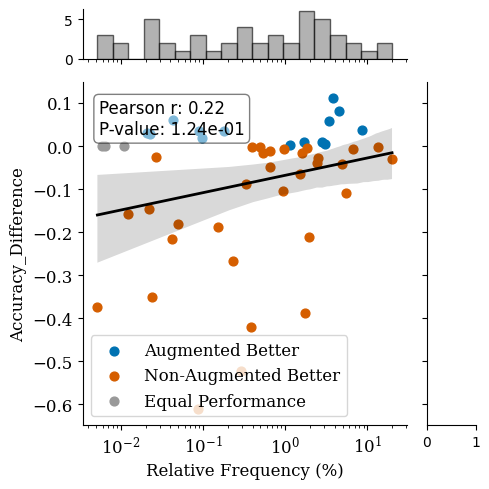

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Load the new data
df = pd.read_csv('celltypist_results_hlca.csv')

# Calculate the difference between Accuracy Augmented and Base
df['Accuracy_Difference'] = df['Accuracy Aug'] - df['Accuracy Base']
df = df[df['Relative Frequency (%)'] != df['Relative Frequency (%)'].min()]

# Filter the data for positive, negative, and equal non-zero differences
positive_diff = df[df['Accuracy_Difference'] > 0]
negative_diff = df[df['Accuracy_Difference'] < 0]
equal_non_zero_diff = df[(df['Accuracy_Difference'] == 0)]

# Use a colorblind-friendly palette
color_augmented = '#0072B2'  # Blue
color_non_augmented = '#D55E00'  # Vermilion
color_equal = '#999999'  # Grey

# Create a JointGrid without the right histogram (deactivate marginal plots)
g = sns.JointGrid(x='Relative Frequency (%)', y='Accuracy_Difference', data=df, height=5, marginal_ticks=True, space=0.2)

# Plot the scatter points with color depending on the sign of the Accuracy_Difference
g.ax_joint.scatter(positive_diff['Relative Frequency (%)'], positive_diff['Accuracy_Difference'], 
                   s=40, color=color_augmented, label="Augmented Better")

g.ax_joint.scatter(negative_diff['Relative Frequency (%)'], negative_diff['Accuracy_Difference'], 
                   s=40, color=color_non_augmented, label="Non-Augmented Better")

g.ax_joint.scatter(equal_non_zero_diff['Relative Frequency (%)'], equal_non_zero_diff['Accuracy_Difference'], 
                   s=40, color=color_equal, label="Equal Performance")

# Histogram on the top
g.ax_marg_x.hist(df['Relative Frequency (%)'], bins=np.geomspace(df['Relative Frequency (%)'].min(), df['Relative Frequency (%)'].max(), 20), 
                 alpha=.6, edgecolor='black', color='grey')

# Labels & Title
font = {'size': 12, 'family': 'serif'}
g.set_axis_labels('Relative Frequency (%)', 'Performance Difference (Δ Accuracy)', **font)
g.ax_joint.set_xscale('log')

# Calculate Pearson correlation
pearson_corr, p_value = pearsonr(df['Relative Frequency (%)'], df['Accuracy_Difference'])

# Add the trend line
sns.regplot(x='Relative Frequency (%)', y='Accuracy_Difference', data=df, ax=g.ax_joint, scatter=False, color='black', line_kws={"linewidth":2}, logx=True)

# Add the Pearson correlation coefficient to the plot
g.ax_joint.text(0.05, 0.95, f'Pearson r: {pearson_corr:.2f}\nP-value: {p_value:.2e}',
                transform=g.ax_joint.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Adjust legend with font properties
g.ax_joint.legend(prop=font)

# Apply font properties to all tick labels
for label in g.ax_joint.get_xticklabels() + g.ax_joint.get_yticklabels():
    label.set_fontsize(font['size'])
    label.set_family(font['family'])

plt.tight_layout()
plt.savefig('celltypist_hlca.svg', bbox_inches='tight')  # Save as SVG
plt.show()


In [36]:
df = pd.read_csv('scGPT_results_hlca.csv')
df

,Cell Type,Relative Frequency (%),Accuracy Base,Accuracy Aug
0,alveolar macrophage,19.997936,0.953680,0.947971
1,type II pneumocyte,13.505477,0.989874,0.975307
2,respiratory basal cell,8.631455,0.916299,0.900381
3,ciliated columnar cell of tracheobronchial tree,6.674364,0.967044,0.942785
4,nasal mucosa goblet cell,5.430702,0.879558,0.894524
5,"CD8-positive, alpha-beta T cell",4.926915,0.892249,0.871040
6,club cell,4.569556,0.619424,0.526398
7,elicited macrophage,3.774851,0.696343,0.697881
8,"CD4-positive, alpha-beta T cell",3.425232,0.587006,0.642185
9,vein endothelial cell,3.085934,0.931438,0.943980


/var/folders/gv/b56jzzws1_923v86q0020jknzdcmt7/T/ipykernel_23790/3000860049.py:64: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


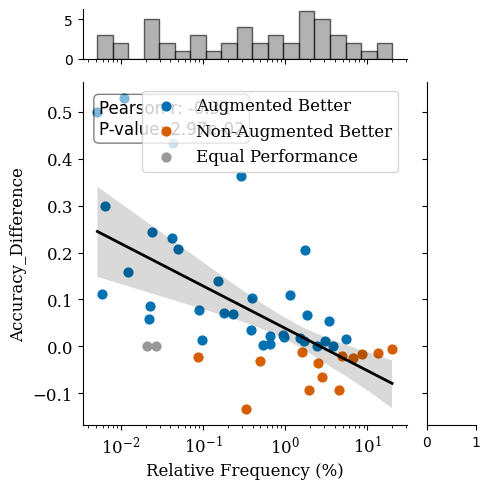

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Load the new data
df = pd.read_csv('scGPT_results_hlca.csv')

# Calculate the difference between Accuracy Augmented and Base
df['Accuracy_Difference'] = df['Accuracy Aug'] - df['Accuracy Base']
df = df[df['Relative Frequency (%)'] != df['Relative Frequency (%)'].min()]

# Filter the data for positive, negative, and equal non-zero differences
positive_diff = df[df['Accuracy_Difference'] > 0]
negative_diff = df[df['Accuracy_Difference'] < 0]
equal_non_zero_diff = df[(df['Accuracy_Difference'] == 0)]

# Use a colorblind-friendly palette
color_augmented = '#0072B2'  # Blue
color_non_augmented = '#D55E00'  # Vermilion
color_equal = '#999999'  # Grey

# Create a JointGrid without the right histogram (deactivate marginal plots)
g = sns.JointGrid(x='Relative Frequency (%)', y='Accuracy_Difference', data=df, height=5, marginal_ticks=True, space=0.2)

# Plot the scatter points with color depending on the sign of the Accuracy_Difference
g.ax_joint.scatter(positive_diff['Relative Frequency (%)'], positive_diff['Accuracy_Difference'], 
                   s=40, color=color_augmented, label="Augmented Better")

g.ax_joint.scatter(negative_diff['Relative Frequency (%)'], negative_diff['Accuracy_Difference'], 
                   s=40, color=color_non_augmented, label="Non-Augmented Better")

g.ax_joint.scatter(equal_non_zero_diff['Relative Frequency (%)'], equal_non_zero_diff['Accuracy_Difference'], 
                   s=40, color=color_equal, label="Equal Performance")

# Histogram on the top
g.ax_marg_x.hist(df['Relative Frequency (%)'], bins=np.geomspace(df['Relative Frequency (%)'].min(), df['Relative Frequency (%)'].max(), 20), 
                 alpha=.6, edgecolor='black', color='grey')

# Labels & Title
font = {'size': 12, 'family': 'serif'}
g.set_axis_labels('Relative Frequency (%)', 'Performance Difference (Δ Accuracy)', **font)
g.ax_joint.set_xscale('log')

# Calculate Pearson correlation
pearson_corr, p_value = pearsonr(df['Relative Frequency (%)'], df['Accuracy_Difference'])

# Add the trend line
sns.regplot(x='Relative Frequency (%)', y='Accuracy_Difference', data=df, ax=g.ax_joint, scatter=False, color='black', line_kws={"linewidth":2}, logx=True)

# Add the Pearson correlation coefficient to the plot
g.ax_joint.text(0.05, 0.95, f'Pearson r: {pearson_corr:.2f}\nP-value: {p_value:.2e}',
                transform=g.ax_joint.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Adjust legend with font properties
g.ax_joint.legend(prop=font)

# Apply font properties to all tick labels
for label in g.ax_joint.get_xticklabels() + g.ax_joint.get_yticklabels():
    label.set_fontsize(font['size'])
    label.set_family(font['family'])

plt.tight_layout()
plt.savefig('scGPT_hlca.svg', bbox_inches='tight')  # Save as SVG
plt.show()
